In [1]:
import numpy as np
from scipy.io import loadmat, wavfile
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
from Signal_Analysis.features.signal import get_F_0, get_HNR
from importlib import reload
import wave
import json
from vosk import Model, KaldiRecognizer,SetLogLevel
import os.path
import math
from folderFunctions import*


# tools work in progress
import tools
reload(tools)
from tools import *

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

In [2]:
#andreas_path = "Inspelning (3).wav"
andreas_path = "example_speech_Andreas/180923214834-Y20UOTIE-text-000.wav"
Fs, x = wavfile.read(andreas_path)
x = x[:,0]
x = x / x.std()
print(len(x)/Fs,"sekunder")

digital_path = "wav_examples/digitala_resurser_sv.wav"
Fs_2, x_2 = wavfile.read(digital_path)
x_2 = x_2 / x_2.std()

45.09315192743764 sekunder


In [8]:
#pre-process andreas to mono
path_output = "audio_preproc/"
_ = preprocess(andreas_path, path_output)


preprocessing 180923214834-Y20UOTIE-text-000


In [11]:
mono_andreas_path = "audio_preproc/180923214834-Y20UOTIE-text-000_pp.wav"
rec_vosk(mono_andreas_path, model)

i ------------------- from 0.27 to 0.42 sec, confidence: 100.00%
skymningen ---------- from 0.42 to 1.26 sec, confidence: 100.00%
en ------------------ from 1.35 to 1.50 sec, confidence: 100.00%
mycket -------------- from 1.50 to 1.80 sec, confidence: 100.00%
het ----------------- from 1.83 to 2.10 sec, confidence: 100.00%
dag ----------------- from 2.10 to 2.43 sec, confidence: 100.00%
i ------------------- from 2.43 to 2.52 sec, confidence: 100.00%
början -------------- from 2.52 to 2.79 sec, confidence: 100.00%
av ------------------ from 2.79 to 2.91 sec, confidence: 100.00%
juli ---------------- from 2.91 to 3.36 sec, confidence: 100.00%
lämnade ------------- from 3.36 to 3.99 sec, confidence: 100.00%
en ------------------ from 3.99 to 4.14 sec, confidence: 100.00%
ung ----------------- from 4.14 to 4.41 sec, confidence: 100.00%
man ----------------- from 4.41 to 4.68 sec, confidence: 100.00%
sin ----------------- from 4.68 to 4.92 sec, confidence: 100.00%
kammare ------------- fro

[{'conf': 1.0, 'end': 0.42, 'start': 0.27, 'word': 'i'},
 {'conf': 1.0, 'end': 1.26, 'start': 0.42, 'word': 'skymningen'},
 {'conf': 1.0, 'end': 1.5, 'start': 1.35, 'word': 'en'},
 {'conf': 1.0, 'end': 1.8, 'start': 1.5, 'word': 'mycket'},
 {'conf': 1.0, 'end': 2.1, 'start': 1.83, 'word': 'het'},
 {'conf': 1.0, 'end': 2.43, 'start': 2.1, 'word': 'dag'},
 {'conf': 1.0, 'end': 2.52, 'start': 2.43, 'word': 'i'},
 {'conf': 1.0, 'end': 2.79, 'start': 2.52, 'word': 'början'},
 {'conf': 1.0, 'end': 2.91, 'start': 2.79, 'word': 'av'},
 {'conf': 1.0, 'end': 3.36, 'start': 2.91, 'word': 'juli'},
 {'conf': 1.0, 'end': 3.99, 'start': 3.36, 'word': 'lämnade'},
 {'conf': 1.0, 'end': 4.14, 'start': 3.99, 'word': 'en'},
 {'conf': 1.0, 'end': 4.41, 'start': 4.14, 'word': 'ung'},
 {'conf': 1.0, 'end': 4.68, 'start': 4.41, 'word': 'man'},
 {'conf': 1.0, 'end': 4.92, 'start': 4.68, 'word': 'sin'},
 {'conf': 1.0, 'end': 5.58, 'start': 4.92, 'word': 'kammare'},
 {'conf': 0.877161, 'end': 5.97, 'start': 5.79

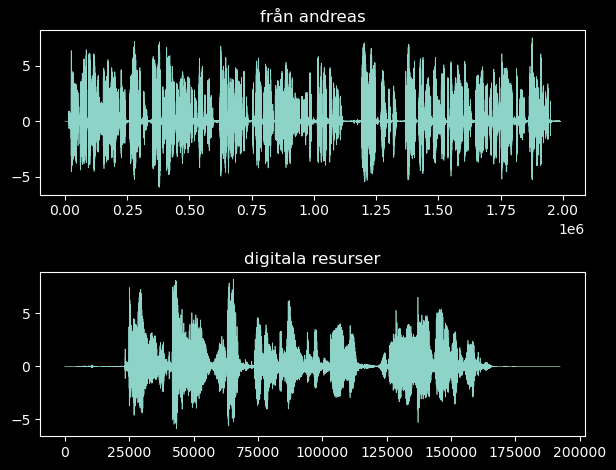

In [3]:
plt.figure()
plt.subplot(211)
plt.title("från andreas")
plt.plot(x)
plt.subplot(212)
plt.title("digitala resurser")
plt.plot(x_2)
plt.tight_layout()
plt.show()

In [5]:
print(Fs_2)

32000


In [10]:
model_path = "models/vosk-model-small-sv-rhasspy-0.15/"
model = Model(model_path)

In [7]:
_ = rec_vosk(andreas_path, model)

hur ----------------- from 4.14 to 4.62 sec, confidence: 47.07%
hänger -------------- from 4.62 to 4.83 sec, confidence: 39.83%
hemma --------------- from 5.97 to 6.36 sec, confidence: 55.56%
igen ---------------- from 6.37 to 7.02 sec, confidence: 89.11%
nu ------------------ from 7.83 to 8.10 sec, confidence: 96.96%
är ------------------ from 8.12 to 8.18 sec, confidence: 49.71%
man ----------------- from 8.82 to 9.45 sec, confidence: 55.19%
hungrig ------------- from 9.75 to 10.17 sec, confidence: 24.74%
han ----------------- from 10.54 to 10.98 sec, confidence: 56.82%
om ------------------ from 11.61 to 12.03 sec, confidence: 31.91%
en ------------------ from 12.78 to 13.20 sec, confidence: 78.35%
snurr --------------- from 15.30 to 15.87 sec, confidence: 78.35%
kan ----------------- from 15.89 to 16.22 sec, confidence: 90.93%
man ----------------- from 16.26 to 16.55 sec, confidence: 90.93%
ana ----------------- from 16.89 to 17.43 sec, confidence: 100.00%
att ----------------- fr

In [8]:
_ = rec_vosk(digital_path, model)

på ------------------ from 0.66 to 0.84 sec, confidence: 100.00%
många --------------- from 0.84 to 1.14 sec, confidence: 100.00%
skolor -------------- from 1.14 to 1.77 sec, confidence: 100.00%
saknas -------------- from 1.80 to 2.52 sec, confidence: 100.00%
såväl --------------- from 2.52 to 2.88 sec, confidence: 100.00%
digitala ------------ from 2.88 to 3.60 sec, confidence: 100.00%
som ----------------- from 3.81 to 3.99 sec, confidence: 100.00%
analoga ------------- from 3.99 to 4.59 sec, confidence: 100.00%
resurser ------------ from 4.59 to 5.25 sec, confidence: 100.00%


## Processing

In [9]:
audio_processed = wavScaler(x)
proc_path = "wav_examples/andreas_proc.wav"
wavfile.write(proc_path, Fs, audio_processed)

## Test processed

In [10]:
#rec_vosk(proc_path,model) 